# Exploratory Data Analysis (EDA)
- [Reference](https://medium.com/analytics-vidhya/a-data-science-project-for-beginners-exploratory-data-analysis-eda-d334f58f94ee)

In [1]:
import pandas as pd 
from datetime import date
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import os
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
!pwd
os.chdir('gdrive/My Drive/Colab Notebooks/')
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content
/content/gdrive/My Drive/Colab Notebooks


In [3]:
data = pd.read_csv('./Walmart_Store_sales.csv')

In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
data.max()

Store                    45
Date             31-12-2010
Weekly_Sales    3.81869e+06
Holiday_Flag              1
Temperature          100.14
Fuel_Price            4.468
CPI                 227.233
Unemployment         14.313
dtype: object

## QUESTION 1 :- Which store has maximum sales in this dataset?

In [7]:
data.loc[data['Weekly_Sales'] ==  data['Weekly_Sales'].max()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1905,14,24-12-2010,3818686.45,0,30.59,3.141,182.54459,8.724


## QUESTION 2 :- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of variance (C0V)

In [8]:
#Here i am grouping by store and finding the standard deviation and mean of each store.
maxstd=pd.DataFrame(data.groupby('Store').agg({'Weekly_Sales':['std','mean']}))
#Just resetting the index.
maxstd = maxstd.reset_index()
#Now we know that CoV is std/ mean we are doing this for each store.
maxstd['CoV'] =(maxstd[('Weekly_Sales','std')]/maxstd[('Weekly_Sales','mean')]) *100
#finding the store with maximum standard deviation.
maxstd.loc[maxstd[('Weekly_Sales','std')]==maxstd[('Weekly_Sales','std')].max()]

Store   Weekly_Sales                      CoV
                    std          mean           
13    14  317569.949476  2.020978e+06  15.713674

## QUESTION 3 :- Which store/s has good quarterly growth rate in Q3’2012.

In [9]:
#Converting the data type of date column to dateTime 
data['Date'] = pd.to_datetime(data['Date'])
#defining the start and end date of Q3 and Q2
Q3_date_from = pd.Timestamp(date(2012,7,1))
Q3_date_to = pd.Timestamp(date(2012,9,30))
Q2_date_from = pd.Timestamp(date(2012,4,1))
Q2_date_to = pd.Timestamp(date(2012,6,30))
#Collecting the data of Q3 and Q2 from original dataset.
Q2data=data[(data['Date'] > Q2_date_from) & (data['Date'] < Q2_date_to)]
Q3data=data[(data['Date'] > Q3_date_from) & (data['Date'] < Q3_date_to)]
#finding the sum weekly sales of each store in Q2
Q2 = pd.DataFrame(Q2data.groupby('Store')['Weekly_Sales'].sum())
Q2.reset_index(inplace=True)
Q2.rename(columns={'Weekly_Sales': 'Q2_Weekly_Sales'},inplace=True)
#finding the sum weekly sales of each store in Q2
Q3 = pd.DataFrame(Q3data.groupby('Store')['Weekly_Sales'].sum())
Q3.reset_index(inplace=True)
Q3.rename(columns={'Weekly_Sales': 'Q3_Weekly_Sales'},inplace=True)
#mergeing Q2 and Q3 data on Store as a common column
Q3_Growth= Q2.merge(Q3,how='inner',on='Store')

In [10]:
#Calculating Growth rate of each Store and collecting it into a dataframe  
Q3_Growth['Growth_Rate'] =(Q3_Growth['Q3_Weekly_Sales'] - Q3_Growth['Q2_Weekly_Sales'])/Q3_Growth['Q2_Weekly_Sales']
Q3_Growth['Growth_Rate']=round(Q3_Growth['Growth_Rate'],2)
Q3_Growth.sort_values('Growth_Rate',ascending=False).head(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
15,16,6626133.44,6441311.11,-0.03


In [11]:
Q3_Growth.sort_values('Growth_Rate',ascending=False).tail(1)

,Store,Q2_Weekly_Sales,Q3_Weekly_Sales,Growth_Rate
13,14,24427769.06,20140430.4,-0.18


## QUESTION 4:- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [12]:
data.groupby('Holiday_Flag')['Weekly_Sales'].mean()

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [13]:
#marking the holiday dates 
Christmas1 = pd.Timestamp(date(2010,12,31) )
Christmas2 = pd.Timestamp(date(2011,12,30) )
Christmas3 = pd.Timestamp(date(2012,12,28) )
Christmas4 = pd.Timestamp(date(2013,12,27) )

Thanksgiving1=pd.Timestamp(date(2010,11,26) )
Thanksgiving2=pd.Timestamp(date(2011,11,25) )
Thanksgiving3=pd.Timestamp(date(2012,11,23) )
Thanksgiving4=pd.Timestamp(date(2013,11,29) )

LabourDay1=pd.Timestamp(date(2010,2,10) )
LabourDay2=pd.Timestamp(date(2011,2,9) )
LabourDay3=pd.Timestamp(date(2012,2,7) )
LabourDay4=pd.Timestamp(date(2013,2,6) )

SuperBowl1=pd.Timestamp(date(2010,9,12) )
SuperBowl2=pd.Timestamp(date(2011,9,11) )
SuperBowl3=pd.Timestamp(date(2012,9,10) )
SuperBowl4=pd.Timestamp(date(2013,9,8) )

#Calculating the mean sales during the holidays
Christmas_mean_sales=data[(data['Date'] == Christmas1) | (data['Date'] == Christmas2) | (data['Date'] == Christmas3) | (data['Date'] == Christmas4)]
Thanksgiving_mean_sales=data[(data['Date'] == Thanksgiving1) | (data['Date'] == Thanksgiving2) | (data['Date'] == Thanksgiving3) | (data['Date'] == Thanksgiving4)]
LabourDay_mean_sales=data[(data['Date'] == LabourDay1) | (data['Date'] == LabourDay2) | (data['Date'] == LabourDay3) | (data['Date'] == LabourDay4)]
SuperBowl_mean_sales=data[(data['Date'] == SuperBowl1) | (data['Date'] == SuperBowl2) | (data['Date'] == SuperBowl3) | (data['Date'] == SuperBowl4)]
#
list_of_mean_sales = {'Christmas_mean_sales' : round(Christmas_mean_sales['Weekly_Sales'].mean(),2),
'Thanksgiving_mean_sales': round(Thanksgiving_mean_sales['Weekly_Sales'].mean(),2),
'LabourDay_mean_sales' : round(LabourDay_mean_sales['Weekly_Sales'].mean(),2),
'SuperBowl_mean_sales':round(SuperBowl_mean_sales['Weekly_Sales'].mean(),2),
'Non holiday weekly sales' : data[data['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()}
list_of_mean_sales

{'Christmas_mean_sales': 960833.11,
 'LabourDay_mean_sales': 1008369.41,
 'Non holiday weekly sales': 1041256.3802088564,
 'SuperBowl_mean_sales': nan,
 'Thanksgiving_mean_sales': 1471273.43}

## QUESTION 5 :-Provide a Monthly,Quaterly and Semester view of sales in units and give insights.

Text(0, 0.5, 'Weekly_Sales')

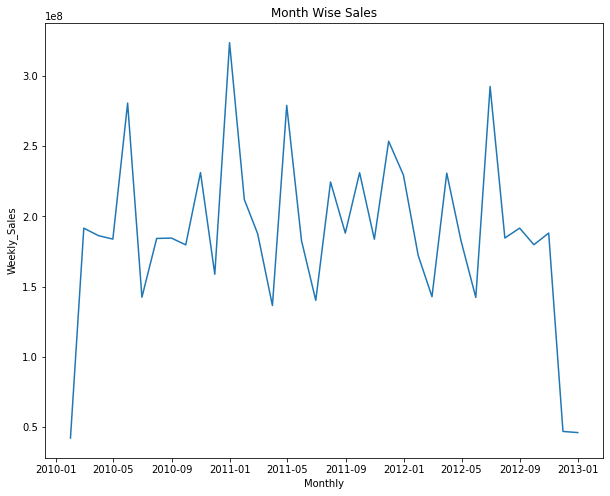

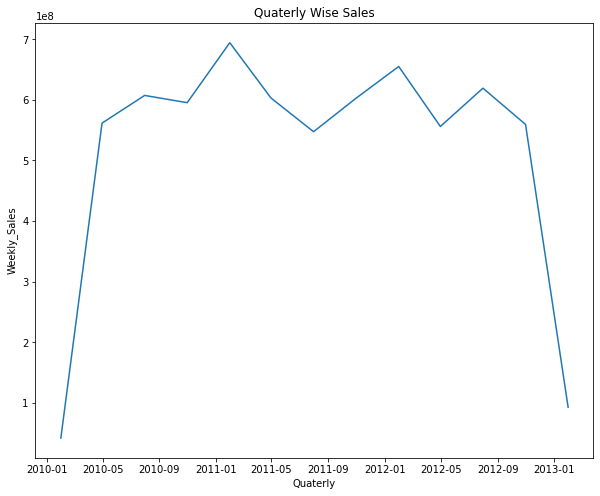

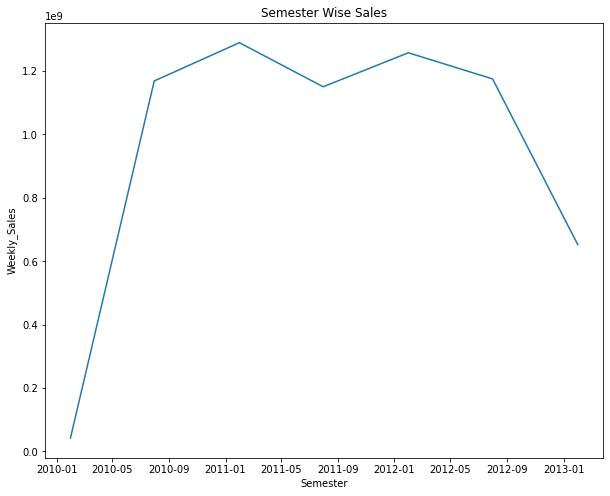

In [14]:
#Monthly sales 
monthly = data.groupby(pd.Grouper(key='Date', freq='1M')).sum()# groupby each 1 month
monthly=monthly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = monthly['Date']
Y = monthly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Month Wise Sales')
plt.xlabel('Monthly')
plt.ylabel('Weekly_Sales')
#Quaterly Sales 
Quaterly = data.groupby(pd.Grouper(key='Date', freq='3M')).sum()
Quaterly = Quaterly.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Quaterly['Date']
Y = Quaterly['Weekly_Sales']
plt.plot(X,Y)
plt.title('Quaterly Wise Sales')
plt.xlabel('Quaterly')
plt.ylabel('Weekly_Sales')
#Semester Sales 
Semester = data.groupby(pd.Grouper(key='Date', freq='6M')).sum()
Semester = Semester.reset_index()
fig, ax = plt.subplots(figsize=(10,8))
X = Semester['Date']
Y = Semester['Weekly_Sales']
plt.plot(X,Y)
plt.title('Semester Wise Sales')
plt.xlabel('Semester')
plt.ylabel('Weekly_Sales')